<a href="https://colab.research.google.com/github/AbdallahAbdalbasset/Handwritten-Digit-Recognition-Using-CNN/blob/main/Digits_Recognition_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

========================= Importing Packages =========================
========================= Imported  Packages =========================

============================ Loading Data ============================
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
see test images
========================== Loading Complete ==========================

========================== Visualizing Data ==========================


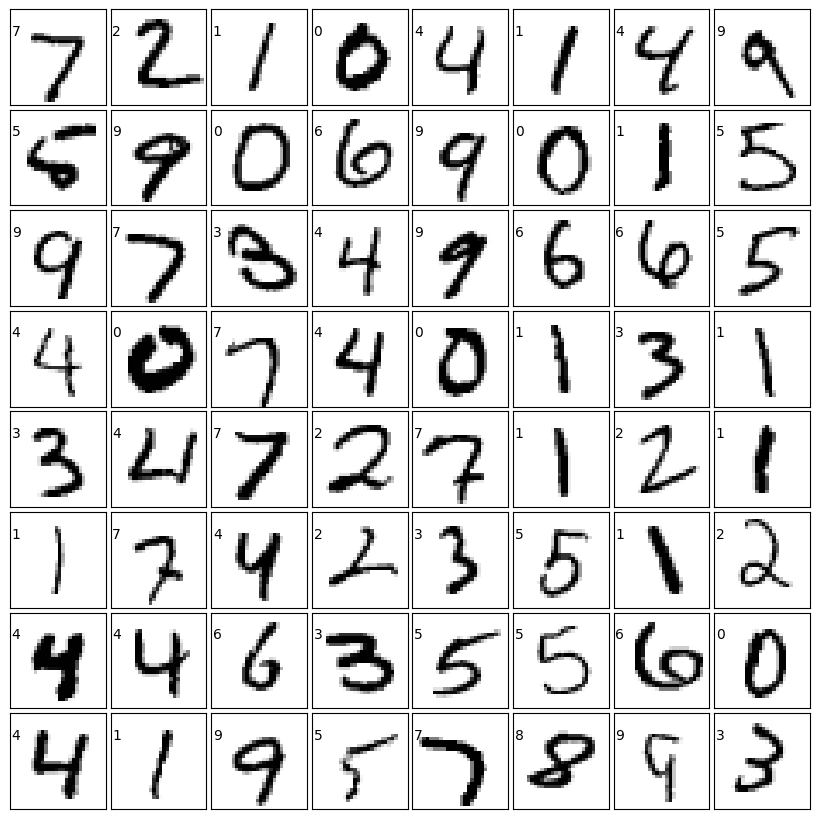


========================== Creating a model ==========================

============================ modelSummary ============================


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

None

========================== Compiling  model ==========================

========================== Model's Compiled ==========================

============================= Model- Fit =============================
Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - acc: 0.9134 - loss: 0.9387
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - acc: 0.9821 - loss: 0.0582
 Model has reached 90% accuracy! Congratulations !!!!!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - acc: 0.9821 - loss: 0.0582

========================== Model Evaluation ==========================
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - acc: 0.9767 - loss: 0.0698

======= Congratulations model was succesful with >90% accuracy =======

================= Now goahead and run the next cell! =================


In [ ]:
print("========================= Importing Packages =========================")
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing import image
from PIL import Image

import cv2

# Warning handler
import warnings
warnings.filterwarnings('ignore')
print("========================= Imported  Packages =========================")
print("")
# Loading Data
print("============================ Loading Data ============================")
handwriting_mnist = keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = handwriting_mnist.load_data()
train_images = train_images.reshape(len(train_images),28,28,1)
test_images = test_images.reshape(len(test_images),28,28,1)
print("see test images")
i = 0
for img in test_images:
  img = Image.fromarray(test_images[i].reshape(28,28))
  img.save(str(i)+".jpeg")
  i = i + 1
  if i > 20:
    break

print("========================== Loading Complete ==========================")
print("")
# Test Data Visualization
print("========================== Visualizing Data ==========================")
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(test_images[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(test_labels[i]))
plt.show()
print("")
# Creating model
print("========================== Creating a model ==========================")
model = keras.models.Sequential([
                                 keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                                 keras.layers.MaxPool2D(2,2),
                                 keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,32)),
                                 keras.layers.MaxPool2D(2,2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128,activation='relu'),
                                 keras.layers.Dense(10,activation='softmax')
])
print("")
print("============================ modelSummary ============================")
print(model.summary())
print("")
# Model Compile
print("========================== Compiling  model ==========================")
model.compile(optimizer='adam',metrics=['acc'],loss='sparse_categorical_crossentropy')
print("")
print("========================== Model's Compiled ==========================")
# Accuracy Callback
class handwriting_acc_callback(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('acc')>=0.98):
       print("\n Model has reached 90% accuracy! Congratulations !!!!!")
       self.model.stop_training = True

handwriting_acc_callback = handwriting_acc_callback()
print("")
# Model Fitting
print("============================= Model- Fit =============================")
model.fit(train_images,train_labels,epochs=100,callbacks=[handwriting_acc_callback])
print("")
# Model Evaluation
print("========================== Model Evaluation ==========================")
model.evaluate(test_images,test_labels)
print("")
print("======================================================================")
print("======================================================================")
print("======= Congratulations model was succesful with >90% accuracy =======")
print("======================================================================")
print("======================================================================")
print("")
print("================= Now goahead and run the next cell! =================")


========================== Model Prediction ==========================


Saving Screenshot 2025-12-07 at 10.04.08 PM.png to Screenshot 2025-12-07 at 10.04.08 PM.png
**************** Uploaded Image ****************


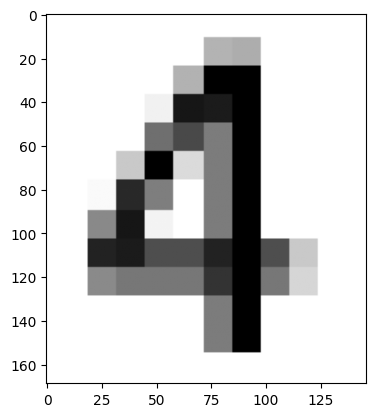

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0.14298584 0.22060736 0.09985141 0.01151319 0.27934796 0.05147058
  0.02550553 0.12223616 0.01676004 0.02972198]]
Predicted Value is: [4]


In [ ]:
import PIL.ImageOps


# Model Prediction
print("========================== Model Prediction ==========================")
uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path)
  img = PIL.ImageOps.invert(img)
  x = image.img_to_array(img)
  x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
  print("**************** Uploaded Image ****************")
  plt.imshow(x,cmap='gray')
  plt.show()
  x = cv2.resize(np.array(x), (28, 28))
  x = x.reshape(28,28,1)
  x = np.expand_dims(x, axis=0)

  class_label = model.predict(x)
  print(class_label)
  print("Predicted Value is:",np.where(class_label[0]==max(class_label[0]))[0])
